## Lagrangian
$$ L = \frac{1}{2} ml^2 \dot{\phi}^2 + mla\gamma^2 \sin(\phi - \gamma t ) + mgl \cos \phi $$

### Equations of Motion

$$ \frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\phi}} \right) = \frac{\partial L}{\partial \phi} $$

- $ \frac{\partial L}{\partial \phi} = mla \gamma^2 \cos(\phi - \gamma t) - mgl \sin \phi $
- $ \frac{\partial L}{\partial \dot{\phi}} = ml^2 \dot{\phi} $
- $ \frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\phi}} \right) = ml^2 \ddot{\phi} $

From this we get,
$$ \ddot{\phi} = \frac{a \gamma^2 }{l} \cos(\phi - \gamma t) - \frac{g}{l} \sin \phi $$

### Energy Equations

$$ E = \dot{\phi} \frac{\partial L}{\partial \dot \phi} - L = \boxed{ \frac{1}{2} ml^2 \dot{\phi}^2 - mla\gamma^2 \sin(\phi - \gamma t) - mgl \cos\phi }$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def equation_of_motion(t, y, a, gamma, l, g):
    phi, phi_dot = y

    phi_ddot = ((a * (gamma ** 2))/l) * np.cos(phi - gamma * t) - g * np.sin(phi) / l

    return [phi_dot, phi_ddot]

In [3]:
def energy_system(phi, phi_dot, m, t, l, a, gamma, g):

    Energy = m * (l**2) * (phi_dot ** 2)/2 - m * l * a * (gamma ** 2) * np.sin(phi - gamma * t) - m * g * l * np.cos(phi)

    return Energy

Energy variation: 5.4510


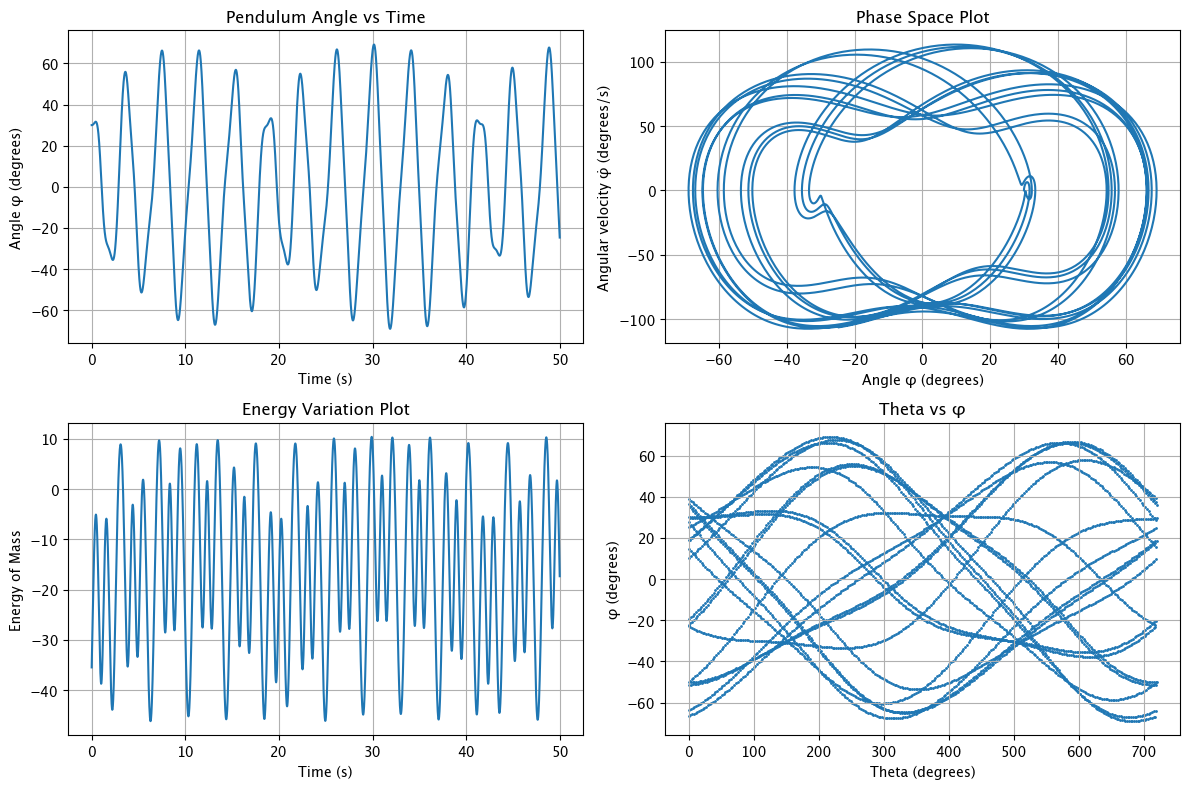

In [53]:
# Test parameters
m = 1.0
a = 0.3 # Support circle radius (m)
gamma = 4.71
# Support angular frequency (rad/s)
l = 3.0        # Pendulum length (m)
g = 9.81       # Gravitational acceleration (m/s²)

# Initial conditions [phi_0, phi_dot_0]
y0 = [np.pi/6, 0]  # Start at 30 degrees, no initial velocity

# Time span
t_span = (0, 50)
t_eval = np.linspace(0, 50, 5000)

# Solve the equation
sol = solve_ivp(equation_of_motion, t_span, y0, args=(a, gamma, l, g),
                t_eval=t_eval, method='RK45',rtol=1e-10, atol=1e-10)

energy = [energy_system(sol.y[0][i], sol.y[1][i], m, sol.t[i], l, a, gamma, g)
          for i in range(len(sol.t))]
energy_variation = (max(energy) - min(energy)) / max(energy)

theta = np.mod(gamma * t_eval,4*np.pi)



# Plot results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(sol.t, np.rad2deg(sol.y[0]))
plt.xlabel('Time (s)')
plt.ylabel('Angle φ (degrees)')
plt.title('Pendulum Angle vs Time')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(np.rad2deg(sol.y[0]), np.rad2deg(sol.y[1]))
plt.xlabel('Angle φ (degrees)')
plt.ylabel('Angular velocity φ̇ (degrees/s)')
plt.title('Phase Space Plot')
plt.tight_layout()
plt.grid(True)



print(f"Energy variation: {energy_variation:.4f}")
plt.subplot(2, 2, 3)
plt.plot(sol.t, energy)
plt.xlabel('Time (s)')
plt.ylabel('Energy of Mass')
plt.title('Energy Variation Plot')
plt.tight_layout()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.scatter(np.rad2deg(theta), np.rad2deg(sol.y[0]), s = 1)
plt.xlabel('Theta (degrees)')
plt.ylabel('φ (degrees)')
plt.grid(True)
plt.tight_layout()
plt.title('Theta vs φ')


plt.show()

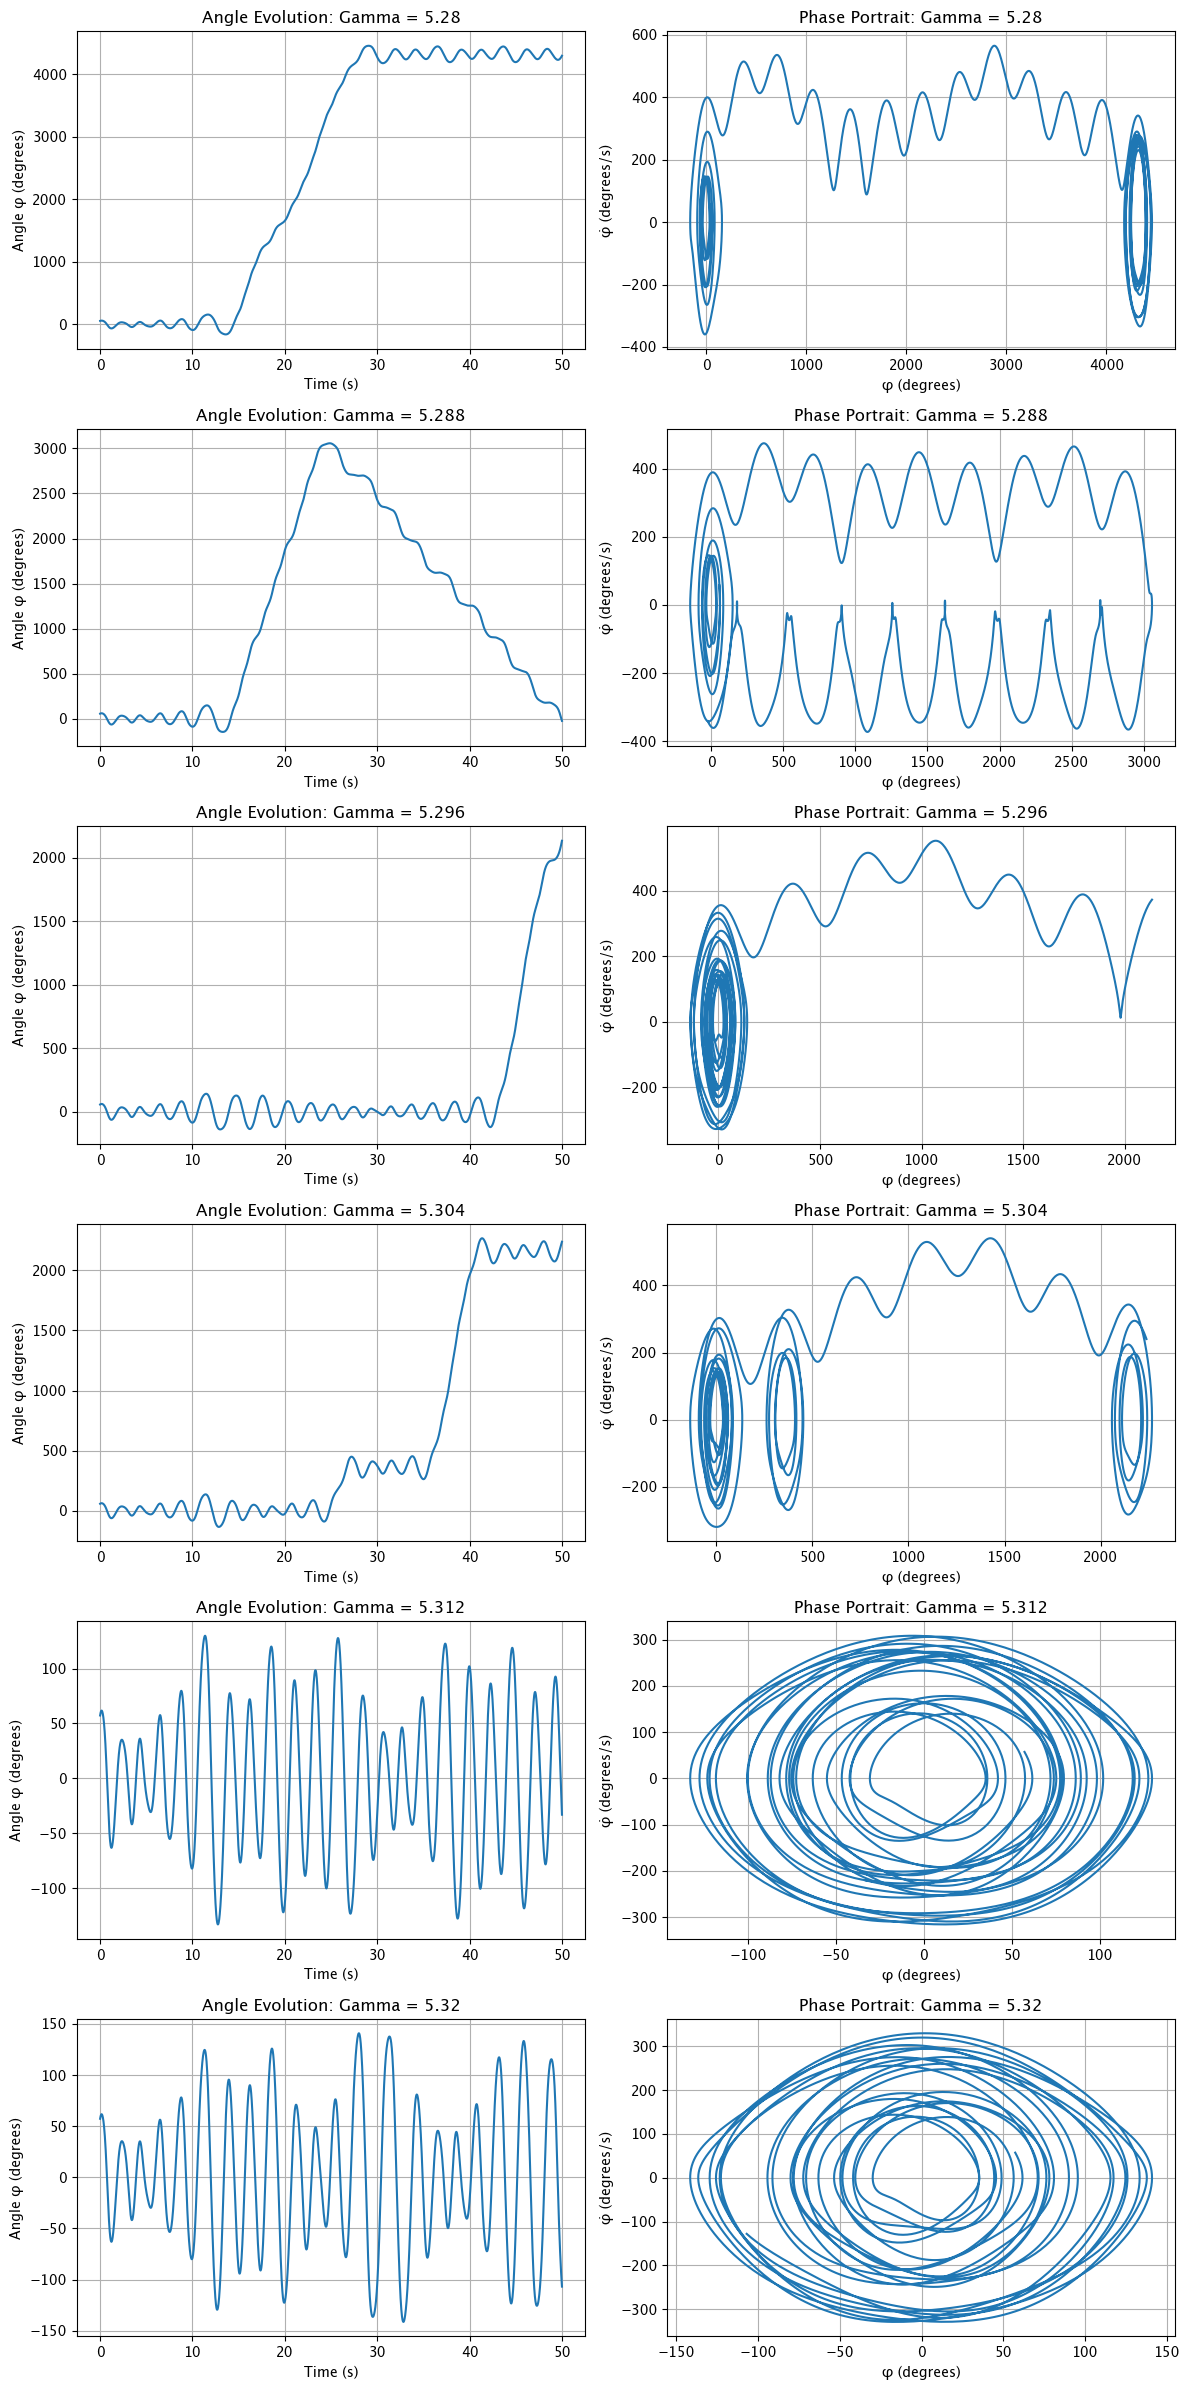

In [5]:
plt.figure(figsize=(12, 24))
for i in range(6):
    sol = solve_ivp(equation_of_motion, t_span, y0, args=(a, 5.0 + 0.28 +(i*0.008), l, g),
                t_eval=t_eval, method='RK45',rtol=1e-10, atol=1e-10)
    plt.subplot(6, 2, 2*i + 1)
    plt.plot(sol.t, np.rad2deg(sol.y[0]))
    plt.xlabel('Time (s)')
    plt.ylabel('Angle φ (degrees)')
    plt.title(f'Angle Evolution: Gamma = {5.0 + 0.28 +(i*0.008)}')
    plt.tight_layout()
    plt.grid(True)


    plt.subplot(6, 2, 2*i+2)
    plt.plot(np.rad2deg(sol.y[0]), np.rad2deg(sol.y[1]))
    plt.xlabel('φ (degrees)')
    plt.ylabel('φ̇ (degrees/s)')
    plt.title(f'Phase Portrait: Gamma = {5.0 + 0.28 +(i*0.008)}')
    plt.tight_layout()
    plt.grid(True)

plt.show()

## Writing Manim Animation Scene

In [6]:
## Initial Conditions

radius = 0.1
length = 1.0
mass = 1.0
gravity = 9.81
gamma = 3.0
y_intial = [0,0]

In [7]:
# time array
dt = 0.01
t_span = (0,30)
t_eval = np.arange(0, 30, dt)

sol = solve_ivp(equation_of_motion, t_span, y_intial, args=(radius, gamma, length, gravity),
                t_eval=t_eval, method='RK45',rtol=1e-10, atol=1e-10)

theta = np.mod(gamma * t_eval,4*np.pi)

In [8]:
support_x = radius * np.cos( sol.t * gamma)
support_y = radius * np.sin( sol.t * gamma)

pendulum_x = length * np.sin( sol.y[0] ) + support_x
pendulum_y = length * np.cos( sol.y[0] ) + support_y

support_x, support_y, pendulum_x, pendulum_y

(array([ 0.1       ,  0.099955  ,  0.09982005, ..., -0.0365909 ,
        -0.03936597, -0.04210561], shape=(3000,)),
 array([0.        , 0.00299955, 0.0059964 , ..., 0.09306506, 0.09192562,
        0.09070346], shape=(3000,)),
 array([0.1       , 0.1       , 0.09999994, ..., 0.3489332 , 0.34094972,
        0.33264252], shape=(3000,)),
 array([1.        , 1.00299955, 1.00599638, ..., 1.01576283, 1.01678236,
        1.01783012], shape=(3000,)))